<a href="https://colab.research.google.com/github/priyanshu3042/customer-segmentation-kmeans/blob/main/%20CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers.csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   

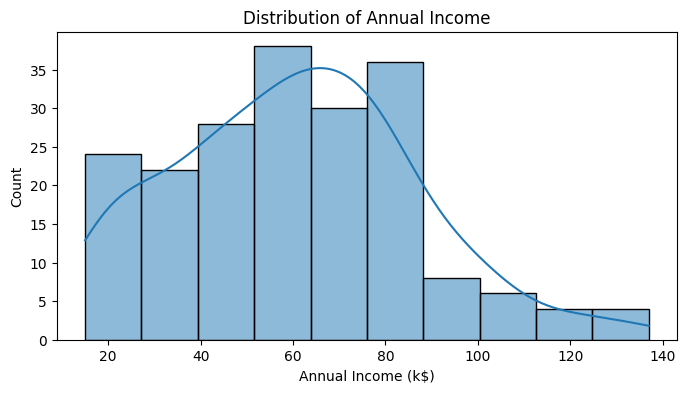

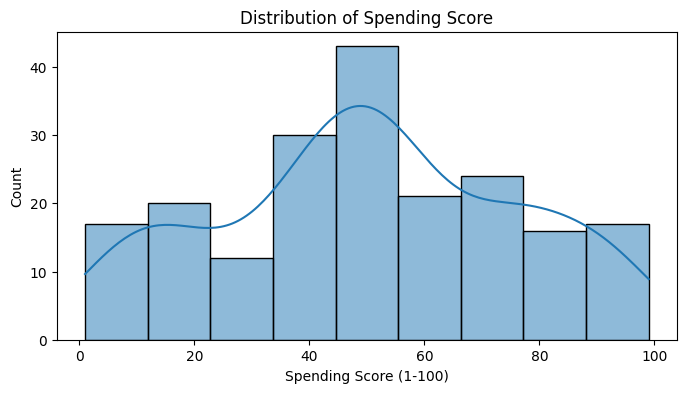

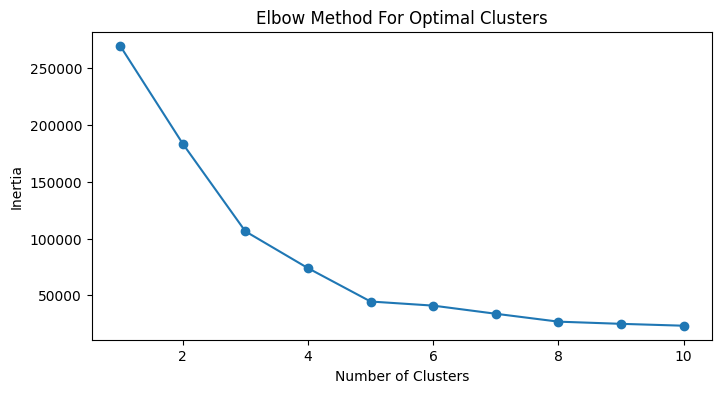

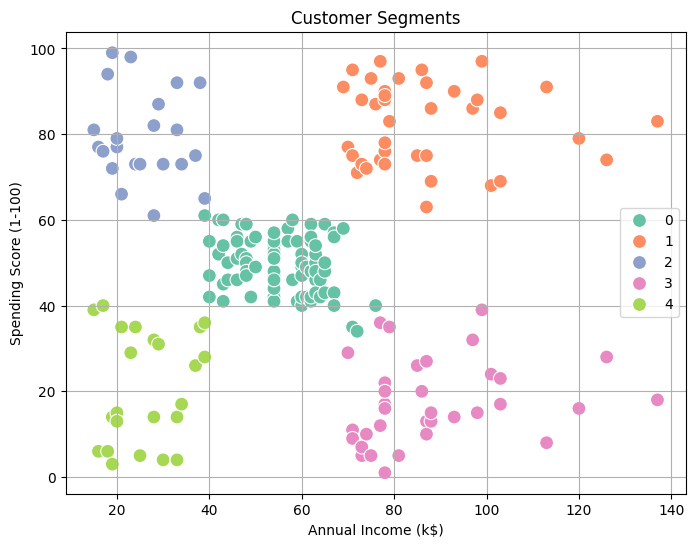

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# =======================
# Customer Segmentation using K-Means
# =======================

# Step 1: Install necessary libraries (optional in Colab)
# !pip install pandas numpy matplotlib seaborn scikit-learn

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 3: Load Dataset from Kaggle or local
# You can manually upload the dataset in Colab or link to Google Drive
from google.colab import files
uploaded = files.upload()

# Replace the file name if different
df = pd.read_csv('Mall_Customers.csv')

# Step 4: Basic Exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 5: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 6: Visualize Distributions
plt.figure(figsize=(8, 4))
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.show()

# Step 7: Elbow Method to Find Optimal k
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 8: Apply K-Means with Optimal k (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 9: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Export Segmented Data (Optional)
df.to_csv('segmented_customers.csv', index=False)
files.download('segmented_customers.csv')
